In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB

In [2]:
#Load the data

url="D:\DMart\Train.csv"

data=pd.read_csv(url)
print(data.head())
print('\n',data.shape)
print('\n',data.dtypes)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data['Item_Weight'].fillna(data['Item_Weight'].median(),inplace=True)


C:\Users\Amrutha\AppData\Local\Temp\ipykernel_7368\3338977290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].median(),inplace=True)


In [7]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_7368\1676880971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)


In [8]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

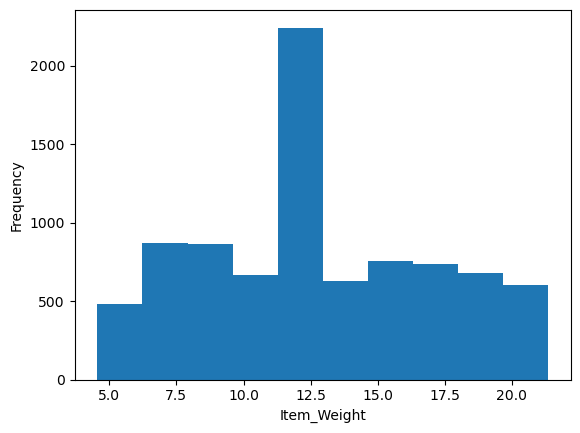

In [9]:
# Exploratory data analysis
data['Item_Weight'].plot(kind='hist')
plt.xlabel('Item_Weight')
plt.show()

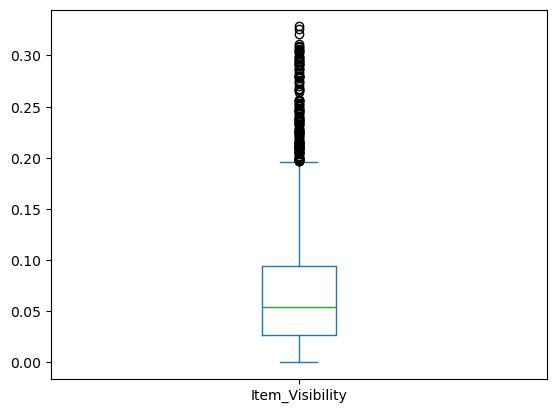

In [10]:
data['Item_Visibility'].plot(kind='box')

plt.show()

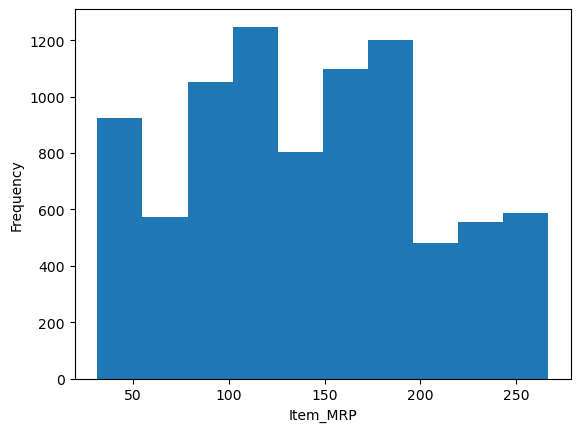

In [11]:
data['Item_MRP'].plot(kind='hist')
plt.xlabel('Item_MRP')
plt.show()

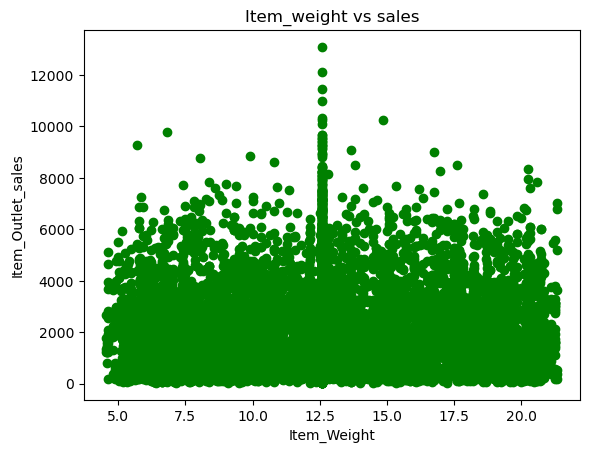

In [12]:
#Item_Weight Vs Output_sale

fig=plt.figure()
plt.scatter(x='Item_Weight',y='Item_Outlet_Sales',color='g',data=data)
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_sales')
plt.title('Item_weight vs sales')
plt.show()

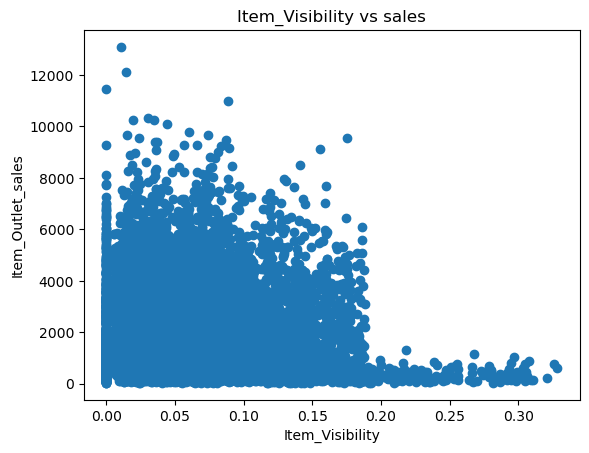

In [13]:
#Item Visibility vs sales

fig=plt.figure()
plt.scatter(x='Item_Visibility',y='Item_Outlet_Sales',data=data)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_sales')
plt.title('Item_Visibility vs sales')
plt.show()

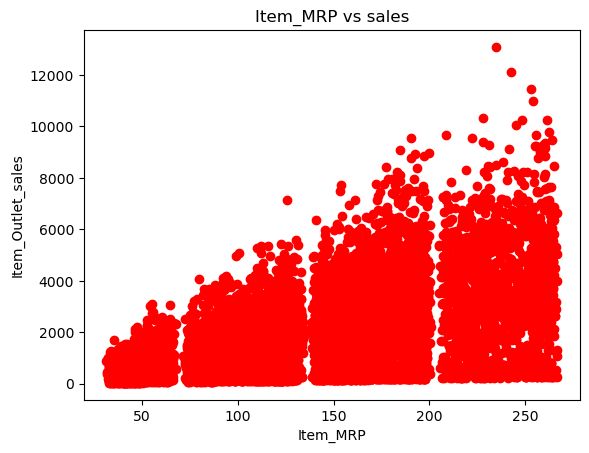

In [14]:
#Item_MRP vs Sales

fig=plt.figure()
plt.scatter(x='Item_MRP',y='Item_Outlet_Sales',color='r',data=data)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_sales')
plt.title('Item_MRP vs sales')
plt.show()

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_7368\627734851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Item_Type',y='Item_Outlet_Sales',data=data,palette='viridis')


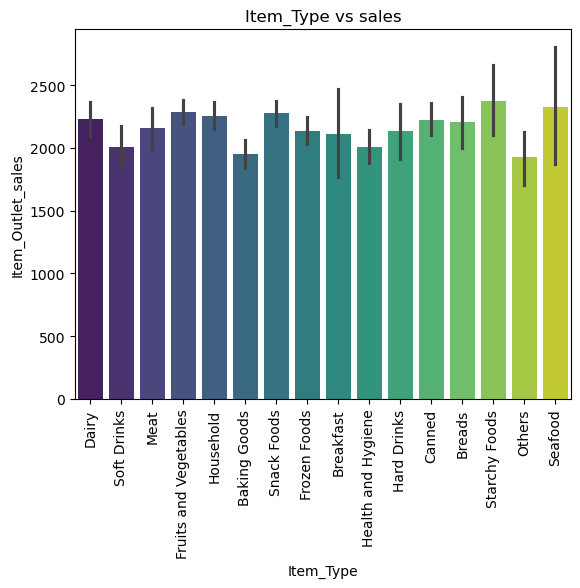

In [15]:
#Item type vs sales

fig=plt.figure()
sn.barplot(x='Item_Type',y='Item_Outlet_Sales',data=data,palette='viridis')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_sales')
plt.title('Item_Type vs sales')
plt.xticks(rotation=90)
plt.show()

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_7368\2418005419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data,palette='magma')


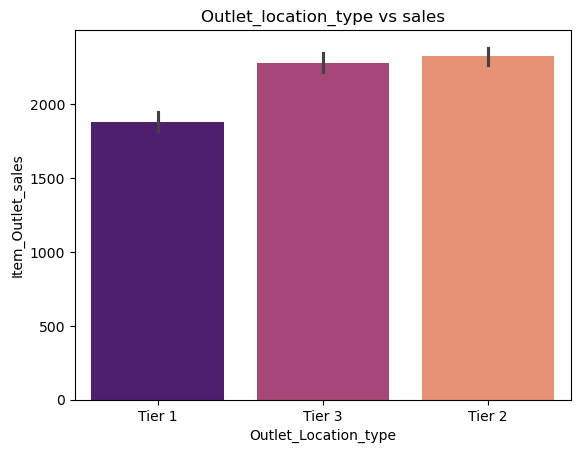

In [16]:
#Outlet_location vs sales

fig=plt.figure()
sn.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data,palette='magma')
plt.xlabel('Outlet_Location_type')
plt.ylabel('Item_Outlet_sales')
plt.title('Outlet_location_type vs sales')
plt.show()

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_7368\702127787.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data,palette='mako')


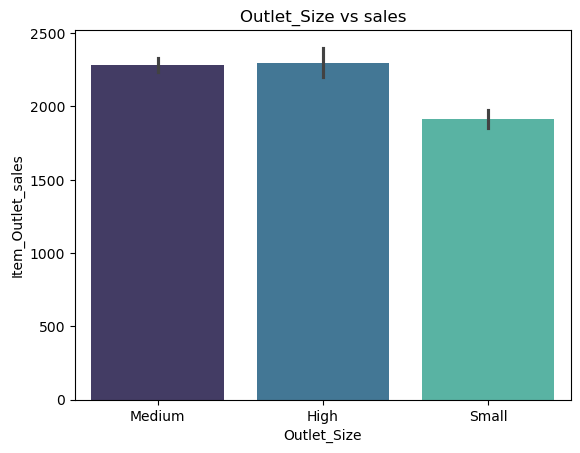

In [17]:
#Outlet_Size vs sales

fig=plt.figure()
sn.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data,palette='mako')
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_sales')
plt.title('Outlet_Size vs sales')
plt.show()

C:\Users\Amrutha\AppData\Local\Temp\ipykernel_7368\3002773610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data,palette='cividis')


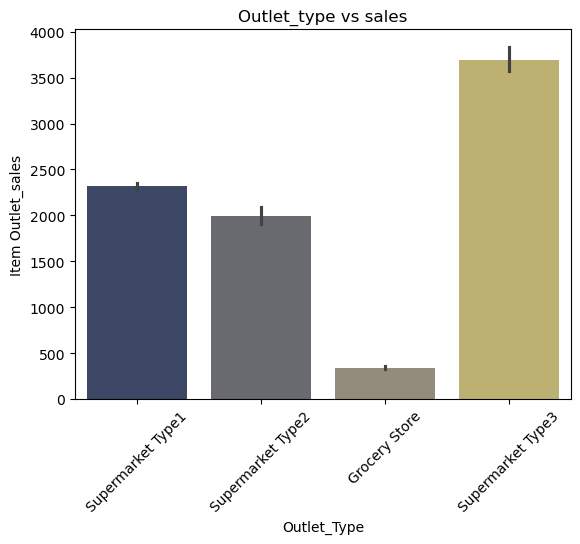

In [18]:
#Outlet type vs sales

fig=plt.figure()
sn.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data,palette='cividis')
plt.xlabel('Outlet_Type')
plt.ylabel('Item Outlet_sales')
plt.title('Outlet_type vs sales')
plt.xticks(rotation=45)
plt.show()

In [19]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Item_Type']=le.fit_transform(data['Item_Type'])
data['Outlet_Type']=le.fit_transform(data['Outlet_Type'])
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])

data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
print(data)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 1         0.016047          4  249.8092   
1           5.920                 2         0.019278         14   48.2692   
2          17.500                 1         0.016760         10  141.6180   
3          19.200                 2         0.000000          6  182.0950   
4           8.930                 1         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 1         0.056783         13  214.5218   
8519        8.380                 2         0.046982          0  108.1570   
8520       10.600                 1         0.035186          8   85.1224   
8521        7.210                 2         0.145221         13  103.1332   
8522       14.800                 1         0.044878         14   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0    

In [20]:
#model predicting

array=data.values
x=array[:,0:9]
y=array[:,9]

test_size=0.33
seed=7
models=[]
models.append(('LR',LinearRegression()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVM',SVR()))

results=[]
names=[]
#scoring='neg_mean_squared_error'

for name,model in models:
    x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=test_size,random_state=seed)
    model.fit(x_train,y_train)
    result=model.score(x_test,y_test)
    results.append(result)
    names.append(name)
    msg='%s: %f'%(name,result)
    print(msg)


LR: 0.497074
KNN: 0.397555
CART: 0.213575
SVM: -0.042086


In [22]:
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
test_size=0.33
seed=7
pipelines=[]
pipelines.append(('ScalerLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScalerKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScalerLCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScalerSVM',Pipeline([('Scaler',StandardScaler()),('SVM',SVR())])))
#results=[]
names=[]
for name,model in pipelines:
    x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=test_size,random_state=seed)
    model.fit(x_train,y_train)
    result=model.score(x_test,y_test)
    names.append(name)
    msg='%s: %f'%(name,result)
    print(msg)

ScalerLR: 0.497074
ScalerKNN: 0.500152
ScalerLCART: 0.197508
ScalerSVM: 0.048709


In [23]:
#model

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

ensembles=[]
ensembles.append(('ET',ExtraTreesRegressor()))
ensembles.append(('RF',RandomForestRegressor()))
ensembles.append(('AB',AdaBoostRegressor()))
ensembles.append(('GB',GradientBoostingRegressor()))
results=[]
names=[]

for name,model in ensembles:
    x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=test_size,random_state=seed)
    model.fit(x_train,y_train)
    result=model.score(x_test,y_test)
    results.append(result)
    names.append(name)
    msg='%s: %f'%(name,result)
    print(msg)


ET: 0.537356
RF: 0.547698
AB: 0.511216
GB: 0.578599


In [ ]:
url2=r"D:\DMart\test.csv"
test_data=pd.read_csv(url2)


In [ ]:
test_data['Item_Weight'].fillna(test_data['Item_Weight'].median(),inplace=True)

In [ ]:
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
from sklearn.metrics import accuracy_score
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
GradientBoostingRegressor()

In [ ]:
le=LabelEncoder()
test_data['Item_Type']=le.fit_transform(test_data['Item_Type'])
test_data['Outlet_Type']=le.fit_transform(test_data['Outlet_Type'])
test_data['Outlet_Size']=le.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type']=le.fit_transform(test_data['Outlet_Location_Type'])
test_data['Item_Fat_Content']=le.fit_transform(test_data['Item_Fat_Content'])

test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


In [ ]:
pred_test=model.predict(test_data)


In [ ]:
submission=pd.read_csv(r"D:\DMart\SampleSubmission.csv")
submission['Item_Outlet_Sales']=pred_test

In [ ]:
submission.to_csv("D:/DMart/final_submission.csv",index=False)